# Drifter Relase Locations on Nemo Grid

In [334]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean
import time
import datetime
from dateutil.parser import parse
from matplotlib import patches
from salishsea_tools import viz_tools
from salishsea_tools import geo_tools
from salishsea_tools import grid_tools
from salishsea_tools import utilities
%matplotlib inline

# ! --- Textfile directory goes here

In [323]:
txtfile_directory = 'Temp/Pawlowicz_drift_release_dates.txt'

In [324]:
nemo_mask =xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02").tmaskutil.sel(gridX = slice(10, 364), gridY = slice(200, 739)).isel(time = 0)
grid = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02").sel(gridX = slice(10, 364), gridY = slice(200, 739))

In [325]:
grid_lat = grid.latitude
grid_lon = grid.longitude

In [326]:
## consumes lat lon of any corrdinate and lat lon values on grid and return the indices and distance to the nearest grid point
def find_closest_index(lat, lon, grid_lat = grid_lat, grid_lon = grid_lon):
    distances = geo_tools.haversine(lon, lat, grid_lon, grid_lat)
    index = np.unravel_index(np.argmin(distances), distances.shape)
    return (index, np.min(distances.values))

In [327]:
dt=np.dtype({'names':['dates'],'formats':['S100']})

In [328]:
loadtxt = open(txtfile_directory, 'r')
drifters = np.loadtxt(loadtxt, usecols =(0,1,2), delimiter = ',')
loadtxt = open(txtfile_directory, 'r')
dates = np.loadtxt(loadtxt, usecols =(3), delimiter = ',', dtype=dt)

In [329]:
parsed = []
for date in dates:
    parsed.append(parse(date[0]))
parsed = np.asarray(parsed)
parsed = parsed[..., np.newaxis]

In [330]:
all_data = np.concatenate((drifters, parsed), axis = 1)

/home/abhudia/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


Text(0.5, 1.0, 'Nearest grid points to drifter release')

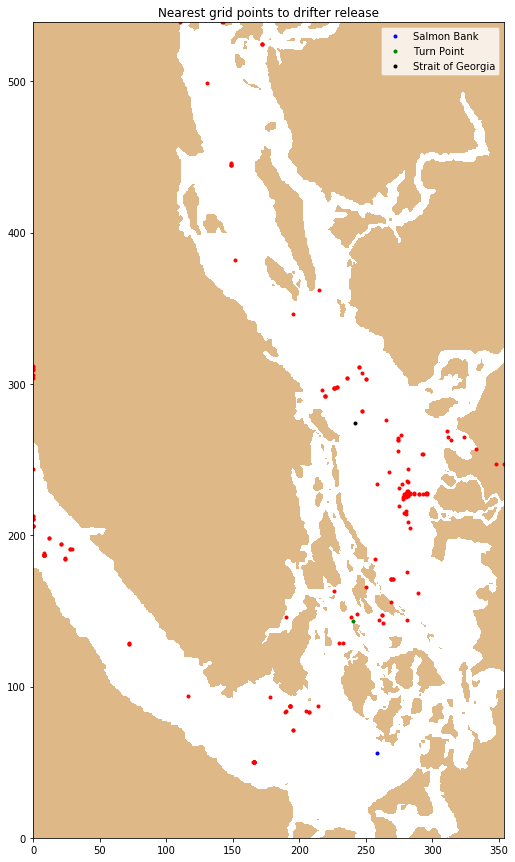

In [331]:
fig = plt.figure(figsize = (15,15))
ax = plt.subplot(111)
plt.contourf(nemo_mask, levels = [-0.1,0.1], colors = 'burlywood')
for drifter in  all_data:
    index = find_closest_index(drifter[1], drifter[0])[0]
    plt.plot(index[1], index[0], 'r.')
viz_tools.set_aspect(ax)
ax.plot([258],[56],"b.", label="Salmon Bank")
ax.plot([240], [143], "g.", label = 'Turn Point')
ax.plot([242], [274], "k.", label = 'Strait of Georgia')
plt.legend()
plt.title('Nearest grid points to drifter release')

# Find drifters closest to 3 points

Radius = 10 km


Drifters within radius 10 km of SoG point:

Index =(276, 265); time (days) = 2014-09-20 05:11:49; distance (km) = 9.968412326014565
Index =(282, 247); time (days) = 2017-02-14 22:03:05; distance (km) = 4.406343047696986
Index =(282, 247); time (days) = 2017-11-28 00:39:44; distance (km) = 4.391117416880188

Drifters within radius 10 km of turn point:

Index =(129, 233); time (days) = 2016-11-01 08:03:12; distance (km) = 7.650155015730338
Index =(148, 243); time (days) = 2017-04-13 17:47:21; distance (km) = 2.744154790298269
Index =(146, 239); time (days) = 2017-05-08 19:56:32; distance (km) = 1.420864404212626
Index =(147, 262); time (days) = 2017-05-12 18:03:13; distance (km) = 9.999106563957708
Index =(147, 262); time (days) = 2017-05-12 18:07:10; distance (km) = 9.733297460085222
Index =(129, 230); time (days) = 2017-09-01 08:17:08; distance (km) = 8.38425604118368
Index =(144, 260); time (days) = 2017-10-07 01:01:34; distance (km) = 8.92364498670166

no drifters fo

/home/abhudia/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


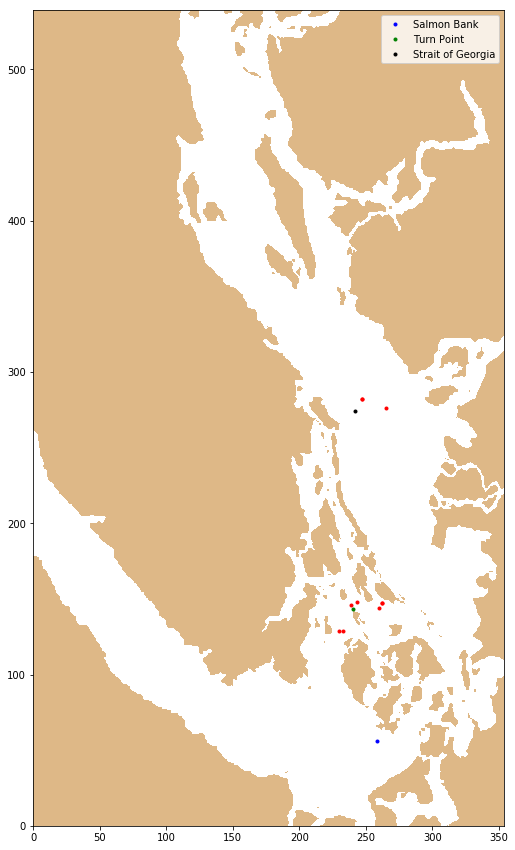

In [333]:
#! ---- Change radius here
radius = 10


print('Radius = {} km\n'.format(radius))
salmon = (grid_lon[56][258],grid_lat[56][258])
turn = (grid_lon[143][240], grid_lat[143][240])
sog = (grid_lon[274][242], grid_lat[274][242])
fig = plt.figure(figsize = (15,15))
ax = plt.subplot(111)
plt.contourf(nemo_mask, levels = [-0.1,0.1], colors = 'burlywood')
for location in ['salmon', 'turn', 'sog']:
    locals()[location +'_drifters'] = []
    locals()[location +'_dates'] = np.array([])
    for drifter in  all_data:
        distance = geo_tools.haversine(drifter[0], drifter[1], locals()[location][0], locals()[location][1]).values
        if distance < radius:
            locals()[location +'_drifters'].append(drifter)
    for drifter in locals()[location +'_drifters']:   
        index = find_closest_index(drifter[1], drifter[0])[0]
        distance = geo_tools.haversine(drifter[0], drifter[1], locals()[location][0], locals()[location][1]).values
        plt.plot(index[1], index[0], 'r.')
        locals()[location +'_dates'] = np.append(locals()[location +'_dates'], np.array([index, str(drifter[3]), distance]))
ax.plot([258],[56],"b.", label="Salmon Bank")
ax.plot([240], [143], "g.", label = 'Turn Point')
ax.plot([242], [274], "k.", label = 'Strait of Georgia')
viz_tools.set_aspect(ax)
plt.legend()

if sog_dates.shape[0] == 0:
    print('\nno drifters found within {} km of SoG point'.format(radius))
else:
    print('\nDrifters within radius {} km of SoG point:\n'.format(radius))
    for i in range(sog_dates.shape[0]):
        if i % 3 != 0 :
            False
        else: 
            print('Index =' + str(sog_dates[i]) + '; time (days) = '  + str(sog_dates[i+1]) + '; distance (km) = ' + str(sog_dates[i+2]))

if turn_dates.shape[0] == 0:
    print('\nno drifters found within {} km of turn point'.format(radius))
else:
    print('\nDrifters within radius {} km of turn point:\n'.format(radius))
    for i in range(turn_dates.shape[0]):
        if i % 3 != 0 :
            False
        else: 
            print('Index = ' + str(turn_dates[i]) + '; time (days) = '  + str(turn_dates[i+1]) + '; distance (km) = ' + str(turn_dates[i+2]))
            
if salmon_dates.shape[0] == 0:
    print('\nno drifters found within {} km of salmon bank'.format(radius))
else:
    print('\nDrifters within radius {} km of Salmon Bank'.format(radius))
    for i in range(salmon_dates.shape[0]):
        if i % 2 != 0 :
            False
        else: 
            print('Index =' + str(salmon_dates[i]) + '; time (days) = '  + str(salmon_dates[i+1]) + '; distance (km) = ' + str(salmon_dates[i+2]))
